# Анализ оттока клиентов банка

Материалы:
- Презентация:  https://disk.yandex.ru/i/jRlYf7-j5RG_Hw

- Дашборд: https://public.tableau.com/app/profile/.54238010/viz/____16826268016330/Dashboard2?publish=yes

В банке в последнее время драматически повысился отток, это начинает становиться проблемой, которая угрожает существованию банка. Раньше проводилось исследование и по нему был составлен дашборд, но он устарел и по нему сейчас не ясно, в чем сейчас заключается проблема и как ее можно решать. Состав клиентов банка изменился и старые клиенты больше не подходят. Поэтому необходимо по заданию отдела маркетинга, максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоточными и покрывали максимум проблемных зон банка. Таким образом маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока клиентов.

# Декомпозиция

1. Загрузим данные из файла
2. Изучим общую информацию о полученном датафрейме
3. Выполним предобработку данных:
  - Преобразуем данные столбцов в нужные типы
  - Заменим названия столбцов при необходимости
  - Проверим кол-во пропусков, при необходимости заполним их
  - Проверим наличие явных и неявных дубликатов
  - Проверим наличие аномальных значений

4. Исследовательский анализ данных:
  - Рассмотрим портреты клиентов, сравним их
  - Проведем анализ как на отток клиентов влияют параметры: город, пол, возраст
  - Промежуточный вывод на основе исследовательского анализа
  - Выделим портреты клиентов, которые склонны уходить из банка

5. Статистический анализ данных:
  - Проверка первой гипотезы
  - Проверка второй гипотезы
  - Промежуточный вывод на основе статистического анализа

6. Сегментация клиентов на основе стратегических показателей
7. Выводы и рекомендации для заказчика

# Описание данных 
(старый и новый датасеты)

- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City / city — город,
- Gender / gender — пол,
- Age / age — возраст,
- Objects — количество объектов в собственности
- equity — приблизительная оценка собственности клиента,
- Balance / balance — баланс на счёте,
- Products / products — количество продуктов, которыми пользуется клиент,
- CreditCard / credit_card — есть ли кредитная карта,
- Loyalty / last_activity — был ли клиент активен последнее время,
- estimated_salary / salary — оценочная заработная плата клиента
- Churn / churn — уходит или нет

### Откроем файл с данными и изучите общую информацию

####  Импортируем библиотеки

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from datetime import datetime, timedelta
from plotly import graph_objects as go

####  Сохраним файл с данными в переменную data.

In [124]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)

####  Выведем на экран первые 10 строк датасета и познакомимся с данными

In [125]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
5,202305,856.00,Рыбинск,М,56.00,4,863687.24,3,1,0,156619.80,0
6,177259,807.00,Ярославль,Ж,39.00,3,405042.44,3,0,1,103838.32,0
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0
8,211686,923.00,Ярославль,М,54.00,5,1206337.87,2,1,0,155371.79,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055.53,0


### Изучим общую информацию о полученном датафрейме

#### Выведем общую информацию

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Предобработка данных

#### Преобразуем данные столбцов в нужные типы

Из общей информации датасета видно, что вносить изменения в типы данных не требуется

#### Переименуем столбцы

In [127]:
data.columns = data.columns.str.lower()
data = data.rename (columns = {'userid':'user_id'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


#### Проверим кол-во пропусков, при необходимости заполним их

##### Выведем количество пропущенных значений для каждого столбца.

In [128]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [129]:
data=data.dropna(subset=['age'])

Пропуски обнаружились в двух столбцах: возраст и баланс на счете. Пропуски с возрастом я предлагаю исключить, так их всего 0,26%. А пропуски в столбце баланса составляют 22,95%, и их природа не исследована.

##### Выявим наличие или отсутствие зависимости пропусков от данных, исследовав данные в разрезе наличия или отсутствия пропусков 

Построим матрицу корреляция пропущенных значений

In [130]:
data.isna().corr()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так как значений в пропусках нет, логично увидеть отсутсвие корреляции между значениями.

Поэтому создадим столбец, в котором будет значение 0 при наличии пропуска в столбце balance, и значение 1 в противоположном случае. И найдем корреляцию от данного столбца.

In [131]:
def fict(balance):
    if balance >= 0:
        return 1
    else:
        return 0

data['balance_new'] = data['balance'].apply(fict)
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0,1
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0,1


In [132]:
data.corr()['balance_new']

user_id         -0.00
score           -0.14
age              0.03
equity           0.71
balance           NaN
products         0.49
credit_card     -0.16
last_activity   -0.03
est_salary      -0.31
churn            0.25
balance_new      1.00
Name: balance_new, dtype: float64

Видим что наличие пропусков в столбце balance имеет положительную линейную корреляцию, а значит и связь с оценкой собственности клиента. Так же положительную но менее сильную связь с кол-во используемых продуктов. При этом отрицательную слабую связь с уровнем заработной платы. Значит у клиентов с пропусками в столбце балансе, чуть выше заработная плата, они пользуются меньшим кол-вом продуктов а так же имеют низкую оценочную стоимость собственности. Еще мы видим слабую связь с оттоком клиентов.

Посчитаем долю пропусков в зависимости является клиент отточным или нет

In [133]:
data[data['balance'].isna()]['churn'].value_counts(normalize=True)*100

0   99.43
1    0.57
Name: churn, dtype: float64

Доля пропуска, которая могла зависеть от того, что клиент ушел, составила всего 0,57%. Но учитывая корреляцию в 25% можем сказать, что связь между оттоком и пропуском есть.  Если есть пропуск в данных — это чёткий признак неотточности клиента.

Так как определить однозначную природу пропусков нам не удалось, предлагаю оставить их не заполненными. П

#### Проверим наличие явных и неявных дубликатов

##### Проверим наличие полных дубликатов

In [134]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют

##### Проверим дубликаты в столбце user_id, это уникальный номер клиентов. Они не должны повторяться.

In [135]:
data['user_id'].duplicated().sum()

50

Обнаружено 50 дубликатов, это 0,5%. Дубликаты предлагаю удалить.

In [136]:
data=data.drop_duplicates (subset=['user_id'])

##### Проверим данные в других столбцах с категориальными переменными

In [137]:
# найдем уникальные значения в столбце city
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [138]:
# найдем уникальные значения в столбце gender:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [139]:
# найдем уникальные значения в столбце credit_card:
data ['credit_card'].unique()

array([0, 1])

In [140]:
# найдем уникальные значения в столбце last_activity:
data ['last_activity'].unique()

array([1, 0])

In [141]:
# найдем уникальные значения в столбце churn:
data ['churn'].unique()

array([1, 0])

#### Рассмотрим описательную статистику столбцов и найдем аномальные значения

In [142]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
count,9924.00,9924.00,9924.00,9924.00,7664.00,9924.00,9924.00,9924.00,9924.00,9924.00,9924.00
mean,171737.16,848.73,42.73,2.63,828206.27,1.87,0.68,0.52,147880.18,0.18,0.77
std,33697.42,65.40,12.18,1.98,1984121.61,0.79,0.47,0.50,139358.30,0.39,0.42
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00,0.00
25%,142725.00,802.00,33.00,0.00,295526.57,1.00,0.00,0.00,75252.18,0.00,1.00
50%,172643.00,853.00,40.00,3.00,524927.74,2.00,1.00,1.00,119715.39,0.00,1.00
75%,201159.25,900.00,51.00,4.00,980753.67,2.00,1.00,1.00,174666.93,0.00,1.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00


Довольно странно что в столбце с кол-во продуктов пользователей, минимальное значение = 0. У клиентов должен быть минимум один продукт. Найдем такие строки.

In [143]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1,0


Такая строка одна. Я думаю ее можно удалить, возможно это какой-то старый клиент, который остался в базе, но больше клиентом не является. Удалим данную строку из данных.

In [144]:
data = data[data['products']!=0]

#### Кодирование данных со столбцами город и пол

Чтобы не потерять оригинальные столбцы с данными, создадим их копии

In [145]:
data['city_cod']=data['city']
data['gender_cod']=data['gender']
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,city_cod,gender_cod
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1,Рыбинск,Ж
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1,Рыбинск,Ж
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,Рыбинск,Ж
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1,Ярославль,Ж
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,1,Ярославль,М


Закодируем данные в новых столбцах

In [146]:
data = pd.get_dummies(data, columns = ['city_cod', 'gender_cod'])
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,city_cod_Ростов,city_cod_Рыбинск,city_cod_Ярославль,gender_cod_Ж,gender_cod_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,1,0,0,1,0,1


Переименуем столбцы для удобства дальнейшего исследования

In [147]:
data = data.rename (
    columns = ({
        'city_cod_Ростов':'Ростов', 'city_cod_Рыбинск':'Рыбинск','city_cod_Ярославль':'Ярославль', 
        'gender_cod_Ж':'women', 'gender_cod_М':'man'}))
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,Ростов,Рыбинск,Ярославль,women,man
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,1,0,0,1,0,1


### Исследовательский анализ данных

#### Анализ корреляции данных из столбцов

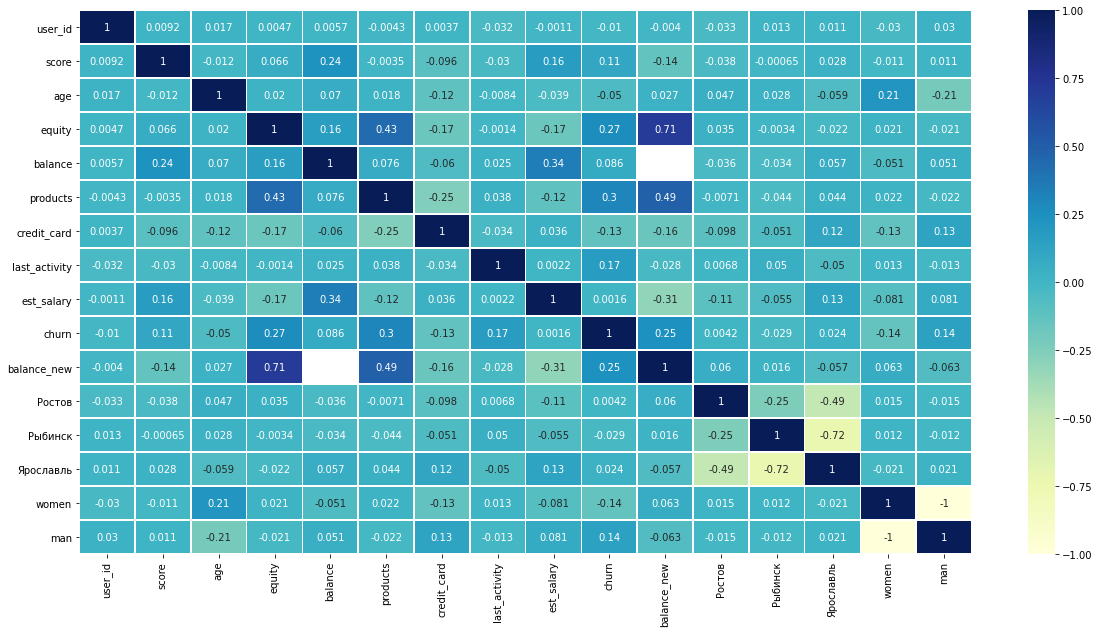

In [148]:
plt.figure(figsize=(20,10))
sns.heatmap (data.corr(), linewidths=.5, annot=True, cmap='YlGnBu');

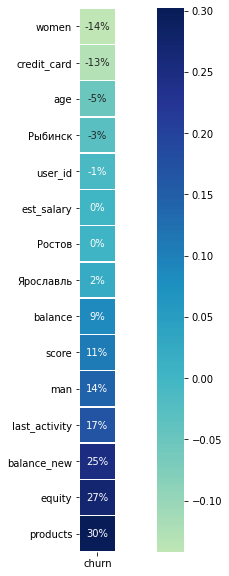

In [149]:
plt.figure(figsize=(15,10))
sns.heatmap (data.corr()[['churn']].drop('churn').sort_values('churn'), linewidths=.5, 
             annot=True, fmt=".0%", cmap='YlGnBu', square=True, center=0);

По таблице видим что столбец churn, в котором указаны данные уходит клиент или нет, имеют наибольшую взаимосвязь со столбцами:
1. age — возраст
2. score — баллы кредитного скоринга
3. credit_card — есть ли кредитная карта
4. women/men - пол
5. last_activity — был ли клиент активен последнее время
6. equity — приблизительная оценка собственности клиента
7. products — количество продуктов, которыми пользуется клиент

Рассмотрим связи по отдельности

#### Составим портреты типичных отточных и неотточных клиентов

In [150]:
data_new=data.groupby('churn').mean().T
data_new.columns = ['churn_0', 'churn_1']
data_new['part']=(data_new['churn_1']/data_new['churn_0']-1)*100
data_new

,churn_0,churn_1,part
user_id,171907.06,170992.83,-0.53
score,845.44,863.36,2.12
age,43.02,41.43,-3.69
equity,2.38,3.76,58.05
balance,733789.92,1134458.21,54.60
products,1.76,2.38,35.20
credit_card,0.71,0.55,-22.17
last_activity,0.48,0.70,45.34
est_salary,147788.27,148357.48,0.39
balance_new,0.72,0.99,37.44


Наиболее отличающимися признаками отточных и неотточных клиентов являются:
 - equity — приблизительная оценка собственности клиента. У отточных клиентов оценка собственности выше, чем у неотточных.
 - balance — баланс на счёте. У отточных клиентов баланс на счете выше, чем у неотточных.
 - last_activity — был ли клиент активен последнее время. Отточные клиенты были более активными в последнее время, чем неотточные
 - gender — пол. Отточные клиенты чаще мужчины, реже женщины. 
 - products — количество продуктов, которыми пользуется клиент. Отточные клиенты пользуются большим кол-вом продуктов банка.

#### Рассмотрим влияние кол-ва продуктов на уход клиента

Найдем сколько кол-во ушедших клиентов и их процент об общего кол-ва в зависимости от кол-ва продуктов

In [151]:
churn_products = data.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
churn_products.columns = churn_products.columns.droplevel(level=1)
churn_products['part'] = churn_products['sum']/churn_products['count']*100
churn_products

,sum,count,part
products,,,
1,235,3306,7.11
2,978,5095,19.20
3,297,1029,28.86
4,300,474,63.29
5,8,19,42.11


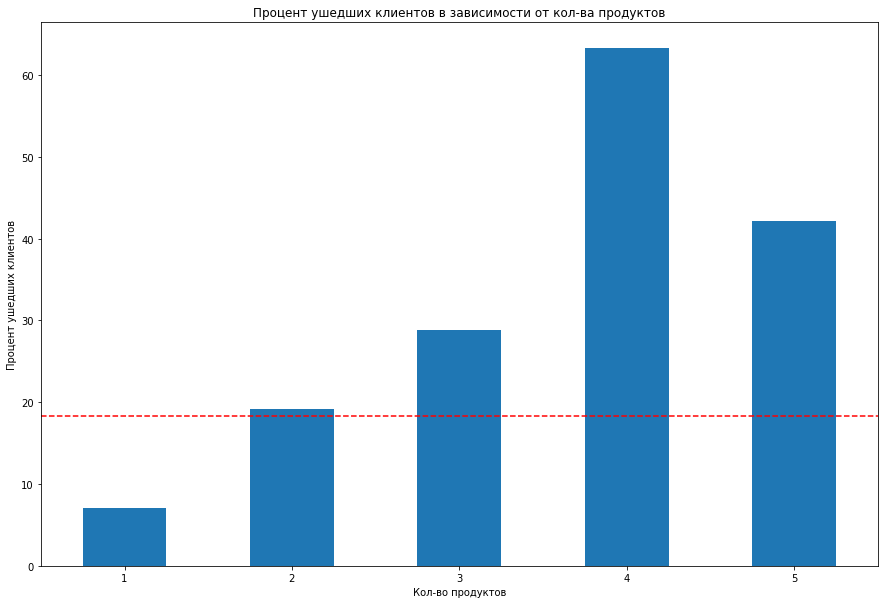

In [152]:
churn_products['part'] .plot(x='products', y='part', kind = 'bar', figsize = (15,10), rot = 0,
                             title = 'Процент ушедших клиентов в зависимости от кол-ва продуктов',
                             xlabel = 'Кол-во продуктов', 
                             ylabel = 'Процент ушедших клиентов')
plt.axhline (y=sum(churn_products['sum'])/sum(churn_products['count'])*100, color='red', linestyle='--');

По графику видно:
- клиенты с 4 продуктами чаще всего покидают банк - их 63,29%
- на втором месте клиенты с 5 продуктами - 42,11%
- реже всего уходят клиенты с 1 продуктом - 7,11%
- клиенты с 2-3 продуктами находятся в диапазоне 19-29%
- повышение отточности относительно среднего уровня касается клиентов с 3-5 продуктами

#### Рассмотрим влияние оценки собственности клиента на его уход

In [153]:
churn_equity = data.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
churn_equity.columns = churn_equity.columns.droplevel(level=1)
churn_equity['part'] = churn_equity['sum']/churn_equity['count']*100
churn_equity

,sum,count,part
equity,,,
0,90,2554,3.52
1,93,771,12.06
2,166,1046,15.87
3,321,1531,20.97
4,464,1841,25.20
5,576,1910,30.16
6,58,161,36.02
7,37,79,46.84
8,6,17,35.29


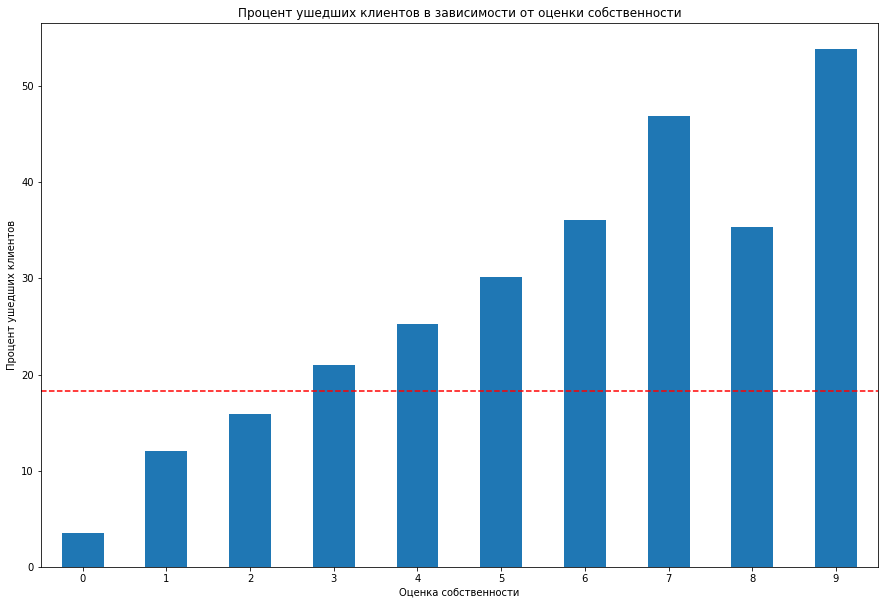

In [154]:
churn_equity['part'] .plot(x='equity', y='part', kind = 'bar', figsize = (15,10), rot = 0,
                           title = 'Процент ушедших клиентов в зависимости от оценки собственности',
                           xlabel = 'Оценка собственности', 
                           ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_equity['sum'])/sum(churn_equity['count'])*100, color='red', linestyle='--');

По графику видно, что с увеличением оценки собственности, увеличивается процент оттока клиентов. Минимальное значение при нулевой оценке - 3,52%. Максимальное значение при оценке 9 - 53,85%. Зависимость практически линейная. Повышение отточности относительно среднего уровня касается клиентов с оценкой собственности 3-9.

#### Рассмотрим влияние активности клиента в последнее время на его уход

In [155]:
churn_last_activity = data.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
churn_last_activity.columns = churn_last_activity.columns.droplevel(level=1)
churn_last_activity['part'] = churn_last_activity['sum']/churn_last_activity['count']*100
churn_last_activity

,sum,count,part
last_activity,,,
0,541,4729,11.44
1,1277,5194,24.59


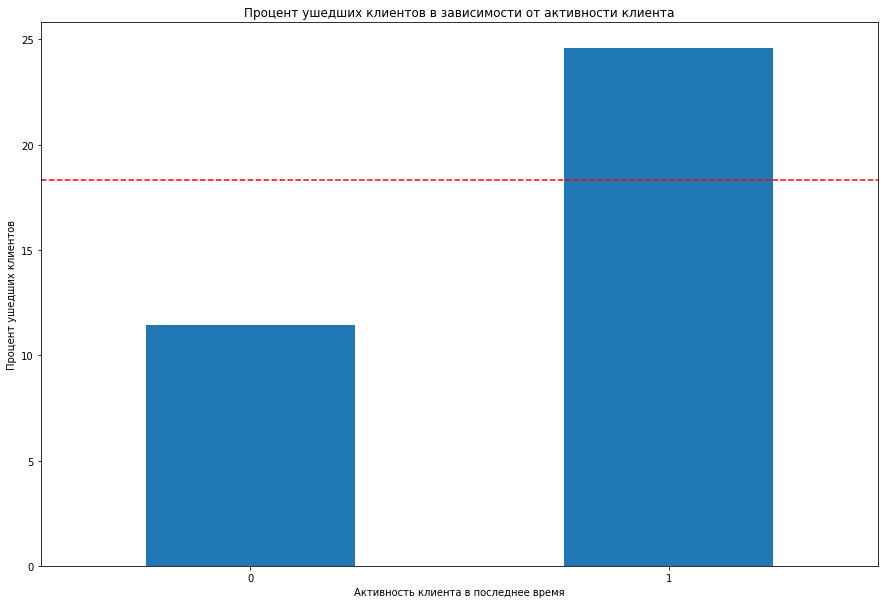

In [156]:
churn_last_activity['part'] .plot(x='last_activity', y='part', kind = 'bar', figsize = (15,10), rot = 0,
                                  title = 'Процент ушедших клиентов в зависимости от активности клиента',
                                  xlabel = 'Активность клиента в последнее время', 
                                  ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_last_activity['sum'])/sum(churn_last_activity['count'])*100, color='red', linestyle='--');

По графику видно, что клиенты с повышенной активностью в два раза чаще покидают банк, нежели не активные пользователи. Возможно это из за того что чем больше пользуешься, тем больше можно обнаружить того, что тебе не нравится. 

#### Рассмотрим влияние пола клиента на его уход

In [157]:
churn_gender = data.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
churn_gender.columns = churn_gender.columns.droplevel(level=1)
churn_gender['part'] = churn_gender['sum']/churn_gender['count']*100
churn_gender

,sum,count,part
gender,,,
Ж,635,4952,12.82
М,1183,4971,23.80


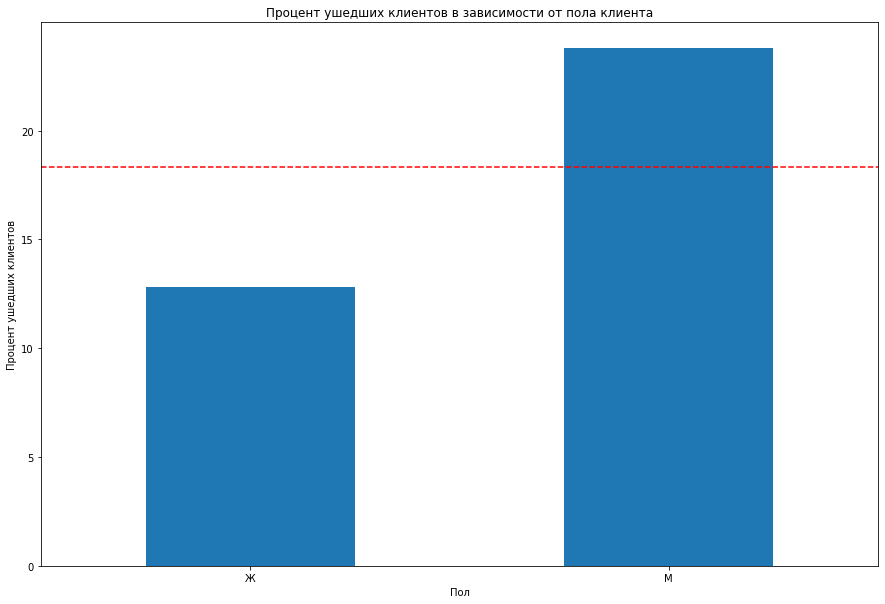

In [158]:
churn_gender['part'] .plot(x='gender', y='part', kind = 'bar', figsize = (15,10), rot = 0,
                           title = 'Процент ушедших клиентов в зависимости от пола клиента',
                           xlabel = 'Пол', 
                           ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_gender['sum'])/sum(churn_gender['count'])*100, color='red', linestyle='--');

По графику видно, что клиенты мужского пола в два раза чаще покидают банк, нежели женского.

#### Рассмотрим влияние наличия кредитной карты у клиента на его уход

In [159]:
churn_credit_card = data.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
churn_credit_card.columns = churn_credit_card.columns.droplevel(level=1)
churn_credit_card['part'] = churn_credit_card['sum']/churn_credit_card['count']*100
churn_credit_card

,sum,count,part
credit_card,,,
0,815,3175,25.67
1,1003,6748,14.86


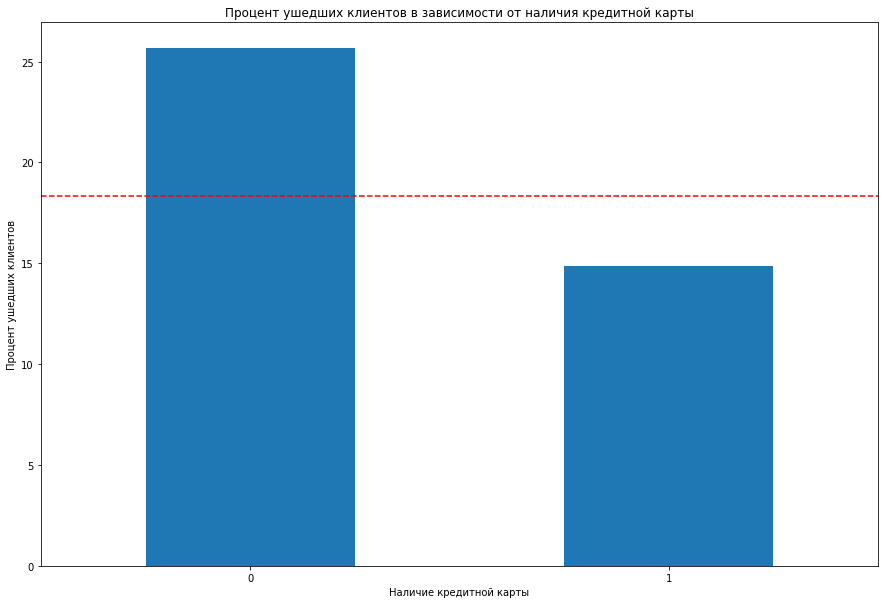

In [160]:
churn_credit_card['part'] .plot(x='credit_card', y='part', kind = 'bar', figsize = (15,10), rot = 0,
                                title = 'Процент ушедших клиентов в зависимости от наличия кредитной карты',
                                xlabel = 'Наличие кредитной карты', 
                                ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_credit_card['sum'])/sum(churn_credit_card['count'])*100, color='red', linestyle='--');

По графику видно, что клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт

#### Рассмотрим влияние скоринга на уход клиента

In [161]:
churn_score = data.pivot_table (index = 'score', values = 'churn', aggfunc = ['sum', 'count'])
churn_score.columns = churn_score.columns.droplevel(level=1)
churn_score['part'] = churn_score['sum']/churn_score['count']*100
churn_score

,sum,count,part
score,,,
642.00,0,2,0.00
646.00,0,2,0.00
648.00,0,2,0.00
649.00,0,7,0.00
650.00,0,2,0.00
...,...,...,...
996.00,0,2,0.00
997.00,0,2,0.00
998.00,0,1,0.00


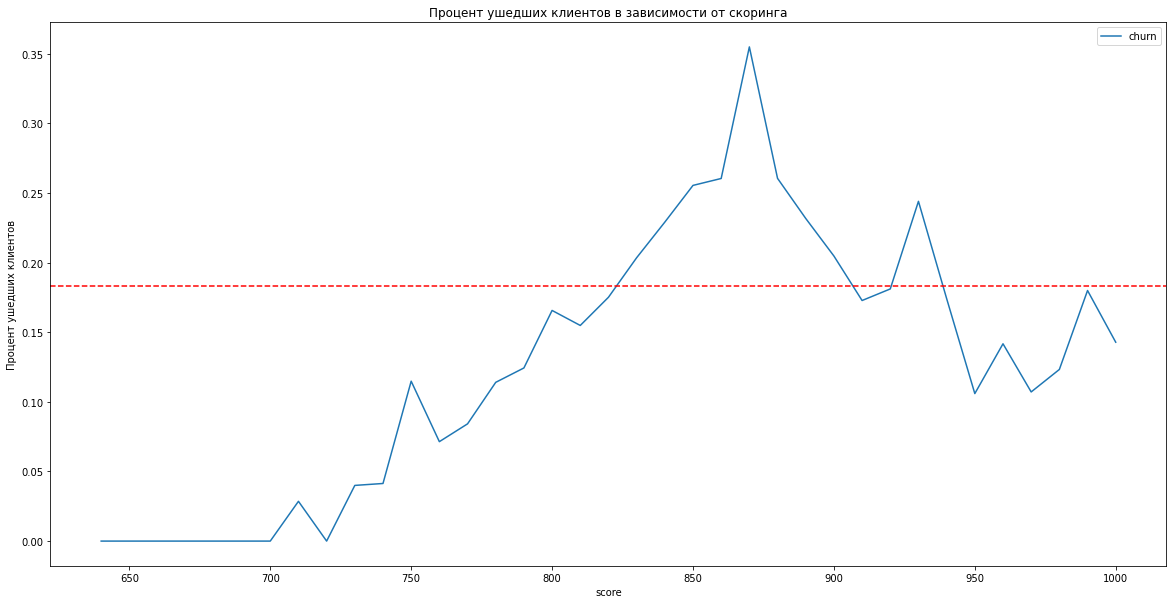

In [162]:
data.assign(score = data.score.round(-1))\
    .groupby("score").agg({"churn":"mean"})\
    .plot(figsize = (20,10),
          title = 'Процент ушедших клиентов в зависимости от скоринга',
          xlabel = 'score', 
          ylabel = 'Процент ушедших клиентов'
         ).axhline(data.churn.mean(), color='red', linestyle='--');

По графику видно, что  клиентами, являются клиенты свысокоотточнымио скорингом 820-940 баллов.

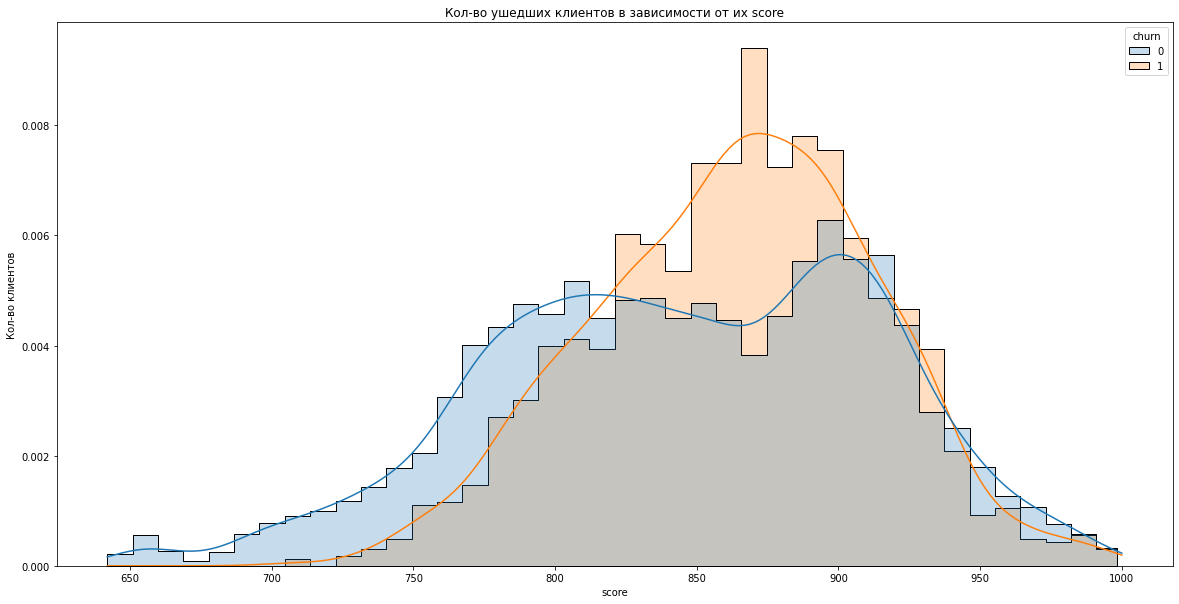

In [163]:
plt.figure(figsize=(20, 10))
sns.histplot(data, x="score", kde=True,  hue="churn", element="step", stat="density", common_norm=False,
             shrink=.8, edgecolor = 'black')
plt.title('Кол-во ушедших клиентов в зависимости от их score')
plt.xlabel('score')
plt.ylabel('Кол-во клиентов')
plt.show()

Нормированная гистограмма еще раз подтверждает,что наиболее отточными являются клиенты со скорингом 820-940 баллов.

#### Рассмотрим влияние возраста клиента на его уход

In [164]:
churn_age = data.pivot_table (index = 'age', values = 'churn', aggfunc = ['sum', 'count'])
churn_age.columns = churn_age.columns.droplevel(level=1)
churn_age['part'] = churn_age['sum']/churn_age['count']*100
churn_age

,sum,count,part
age,,,
18.00,1,13,7.69
19.00,1,16,6.25
20.00,3,23,13.04
21.00,4,15,26.67
22.00,4,26,15.38
...,...,...,...
81.00,0,4,0.00
82.00,0,2,0.00
83.00,0,3,0.00


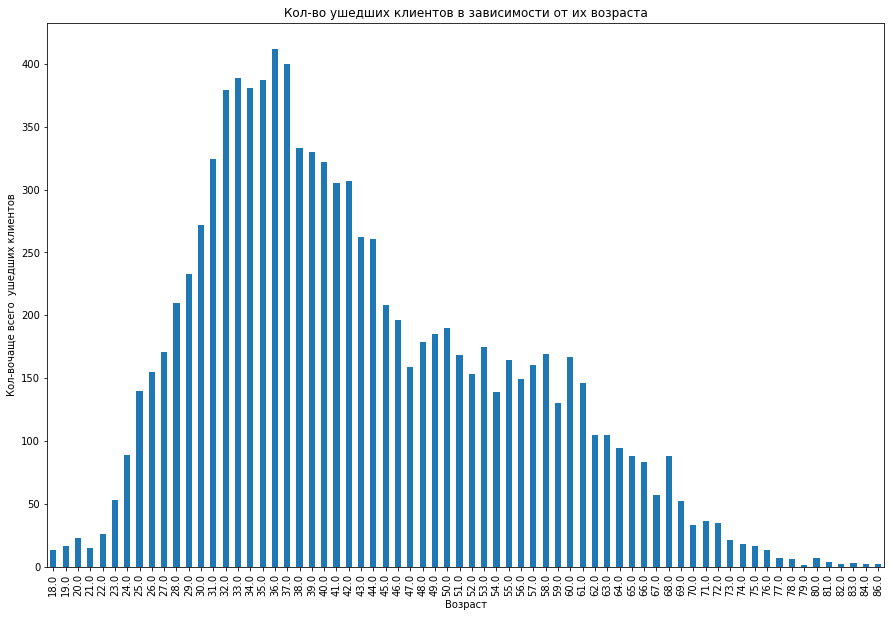

In [165]:
churn_age['count'].plot(x='age', y='count', kind = 'bar', figsize = (15,10), rot = 90,
                                title = 'Кол-во ушедших клиентов в зависимости от их возраста',
                                xlabel = 'Возраст', 
                                ylabel = 'Кол-вочаще всего  ушедших клиентов');

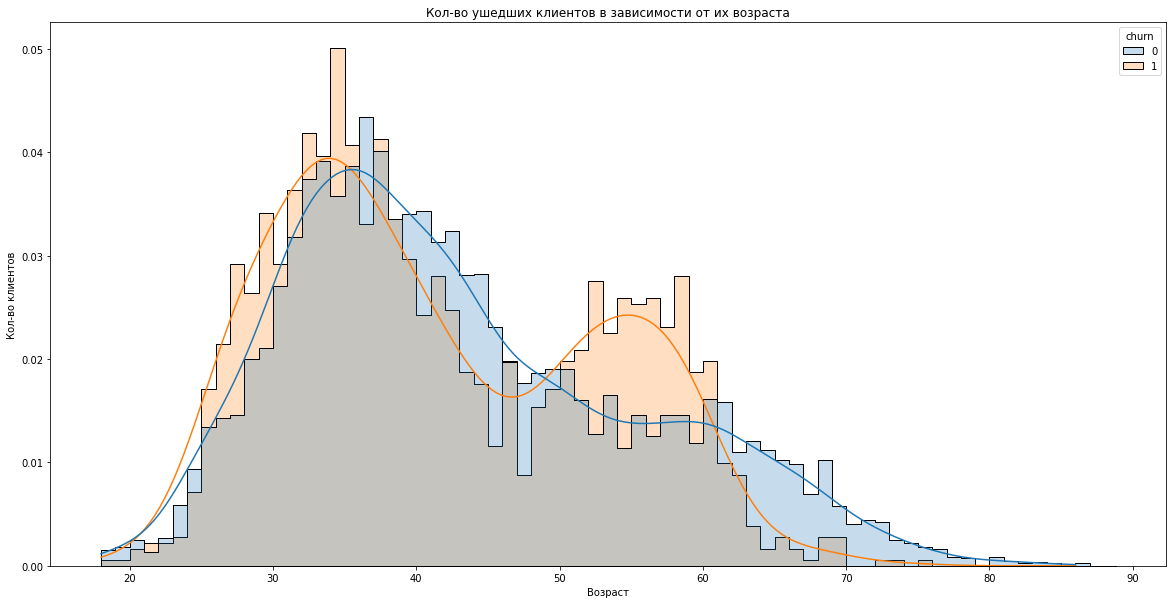

In [166]:
plt.figure(figsize=(20, 10))
sns.histplot(data, x="age", kde=True, hue="churn", element="step", stat="density", common_norm=False,
             shrink=.8, edgecolor = 'black',
             bins=range(18,90))
plt.title('Кол-во ушедших клиентов в зависимости от их возраста')
plt.xlabel('Возраст')
plt.ylabel('Кол-во клиентов')
plt.show()

Предлагаю категоризировать возраст клиентов на 5 групп:
- 18-25 лет
- 26-37 лет
- 38-50 лет
- 51-61 лет
- 62-86 лет

Создадим столбец с данной категорией клиентов

In [167]:
def age_group(age):
    if 25 >= age >= 18:
        return '18-25'
    if 37 >= age >= 26:
        return '26-37'
    if 50 >= age >= 38:
        return '38-50'
    if 61 >= age >= 51:
        return '51-61' 
    if 62 <= age:
        return '62-86' 
data['age_group'] = data['age'].apply (age_group)
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new,Ростов,Рыбинск,Ярославль,women,man,age_group
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0,18-25
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,1,0,1,0,1,0,26-37
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,0,1,0,1,0,26-37
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,1,0,51-61
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,1,0,0,1,0,1,26-37


Посчитаем данные теперь по категориям

In [168]:
churn_age_group = data.pivot_table (index = 'age_group', values = 'churn', aggfunc = ['sum', 'count'])
churn_age_group.columns = churn_age_group.columns.droplevel(level=1)
churn_age_group['part'] = churn_age_group['sum']/churn_age_group['count']*100
churn_age_group

,sum,count,part
age_group,,,
18-25,62,375,16.53
26-37,769,3713,20.71
38-50,489,3237,15.11
51-61,450,1720,26.16
62-86,48,878,5.47


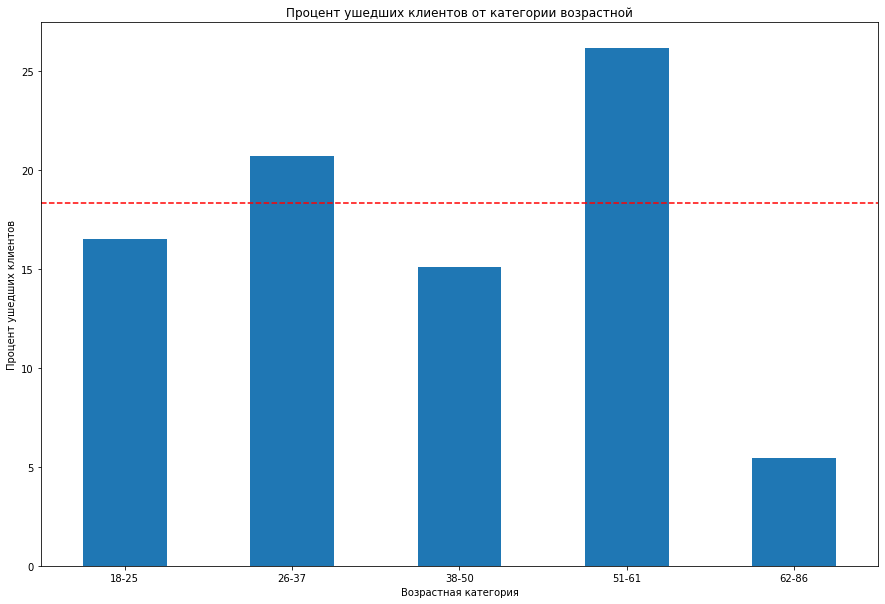

In [169]:
churn_age_group['part'] .plot(kind = 'bar', figsize = (15,10), rot = 0,
                          title = 'Процент ушедших клиентов от категории возрастной',
                          xlabel = 'Возрастная категория', 
                          ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_age_group['sum'])/sum(churn_age_group['count'])*100, color='red', linestyle='--');

Наиболее отточными клиентами являются люди возрастных категорий 26-37 и 51-61. Самыми менее отточными клиентами явлюятся пожилые люди 62-86 лет.

#### Рассмотрим влияние баланса клиента на его уход

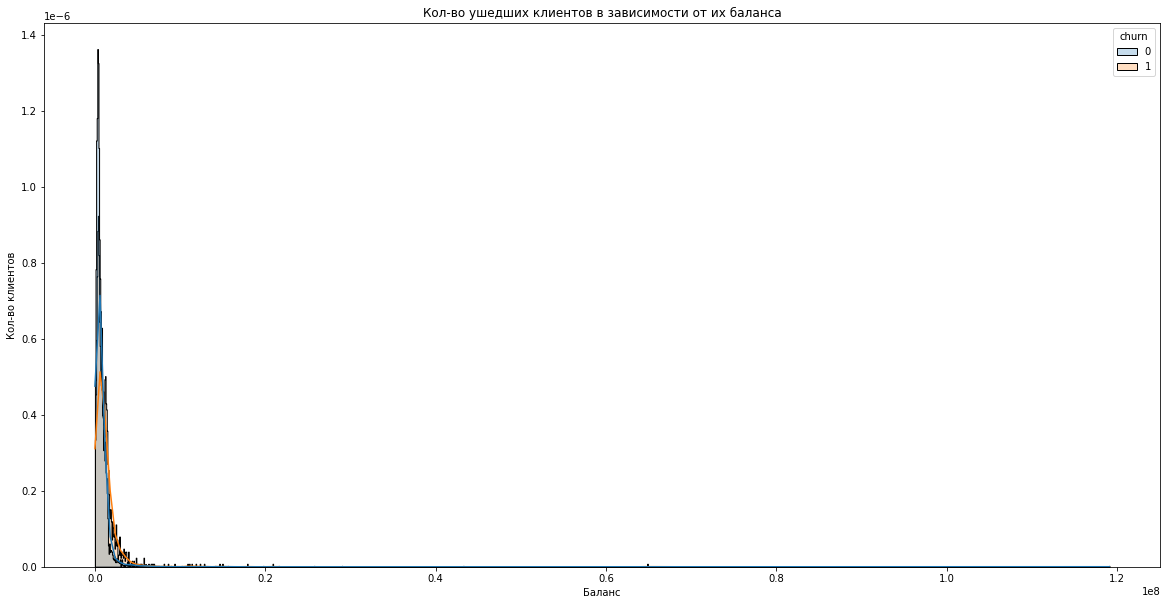

In [170]:
plt.figure(figsize=(20, 10))
sns.histplot(data, x="balance", kde=True,  hue="churn", element="step", stat="density", common_norm=False,
             shrink=.8, edgecolor = 'black')
plt.title('Кол-во ушедших клиентов в зависимости от их баланса')
plt.xlabel('Баланс')
plt.ylabel('Кол-во клиентов')
plt.show()

Зададим лимит по оси x, для лучшей наглядности графика

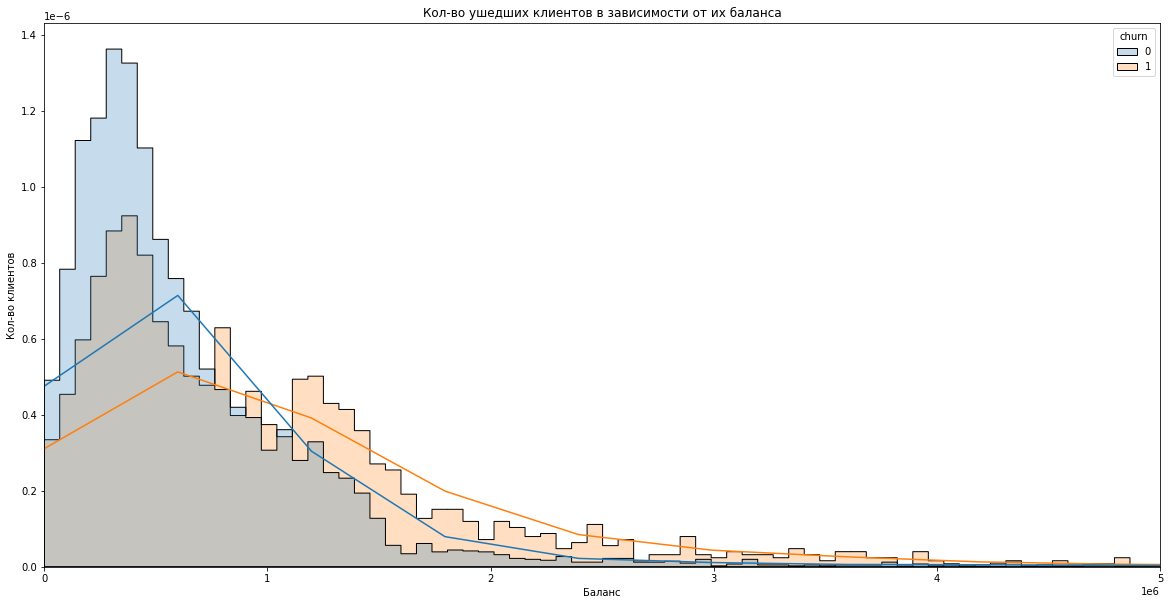

In [171]:
plt.figure(figsize=(20, 10))
sns.histplot(data, x="balance", kde=True,  hue="churn", element="step", stat="density", common_norm=False,
             shrink=.8, edgecolor = 'black')
plt.title('Кол-во ушедших клиентов в зависимости от их баланса')
plt.xlabel('Баланс')
plt.ylabel('Кол-во клиентов')
plt.xlim([0, 5000000])
plt.show()

График показывает что кол-во отточных клиентов после баланса в 1 000 000р увеличивается отсительно неотточных.

In [172]:
def balance_group(balance):
    if 0 >= balance >= 1000000:
        return '0-1.0'
    if 2000000 >= balance >= 1000001:
        return '1-2.0'
    if 3000000 >= balance >= 2000001:
        return '2-3.0'
    if 4000000 >= balance >= 3000001:
        return '3-4.0' 
    if 4000001 <= balance:
        return '4-8' 
data['balance_group'] = data['balance'].apply (balance_group)

In [173]:
churn_balance_group = data.pivot_table (index = 'balance_group', values = 'churn', aggfunc = ['sum', 'count'])
churn_balance_group.columns = churn_balance_group.columns.droplevel(level=1)
churn_balance_group['part'] = churn_balance_group['sum']/churn_balance_group['count']*100

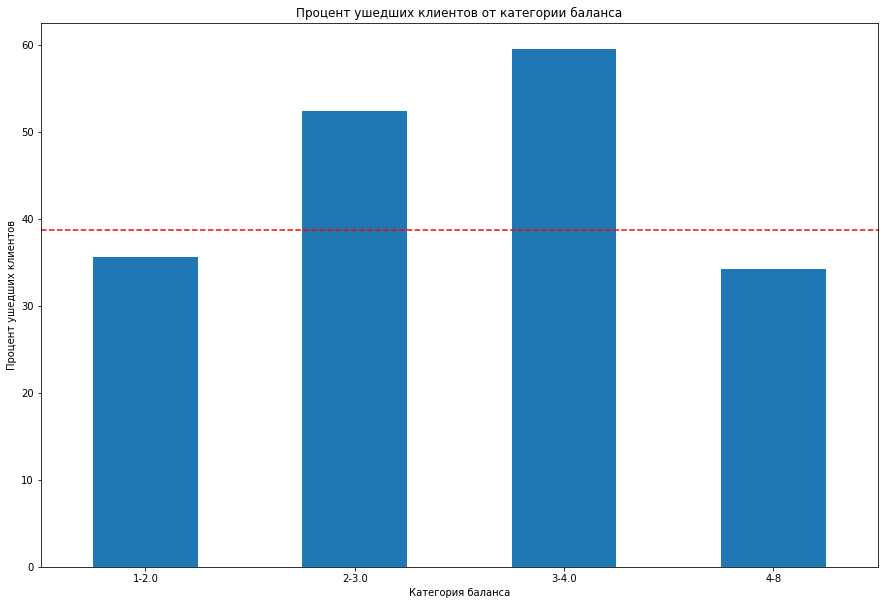

In [174]:
churn_balance_group['part'] .plot(kind = 'bar', figsize = (15,10), rot = 0,
                          title = 'Процент ушедших клиентов от категории баланса',
                          xlabel = 'Категория баланса', 
                          ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_balance_group['sum'])/sum(churn_balance_group['count'])*100, color='red', linestyle='--');

Наиболее отточными клиентами являются люди с балансом от 2 до 4 млн. 

#### Рассмотрим влияние заработной платы клиента на его уход

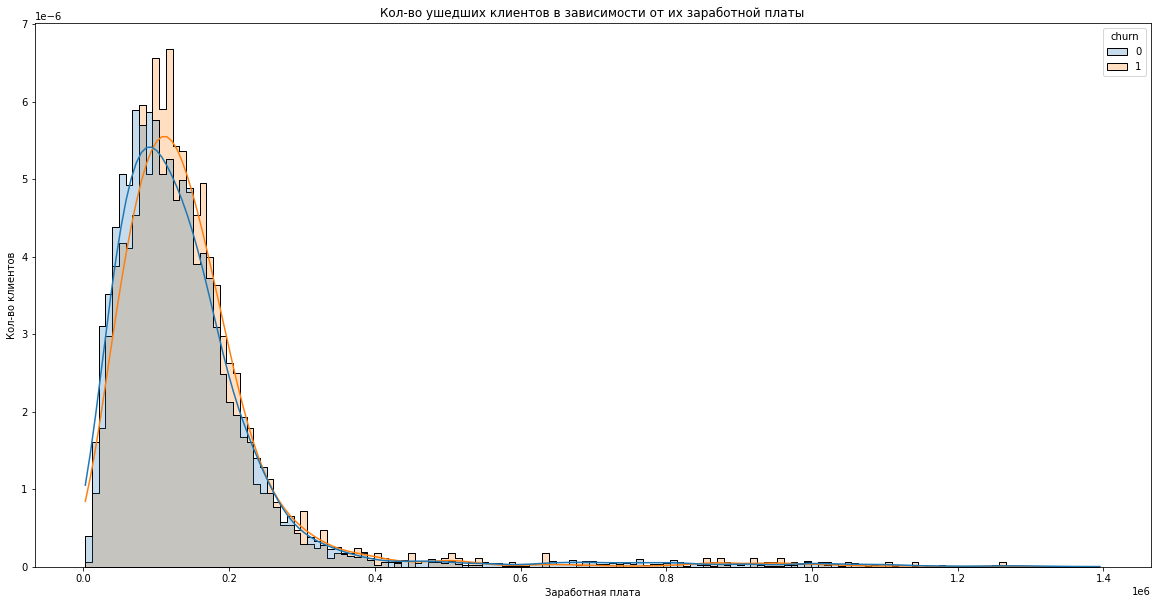

In [175]:
plt.figure(figsize=(20, 10))
sns.histplot(data, x="est_salary", kde=True,  hue="churn", element="step", stat="density", common_norm=False,
             shrink=.8, edgecolor = 'black')
plt.title('Кол-во ушедших клиентов в зависимости от их заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Кол-во клиентов')
plt.show()

Зададим лимит по оси x, для лучшей наглядности графика

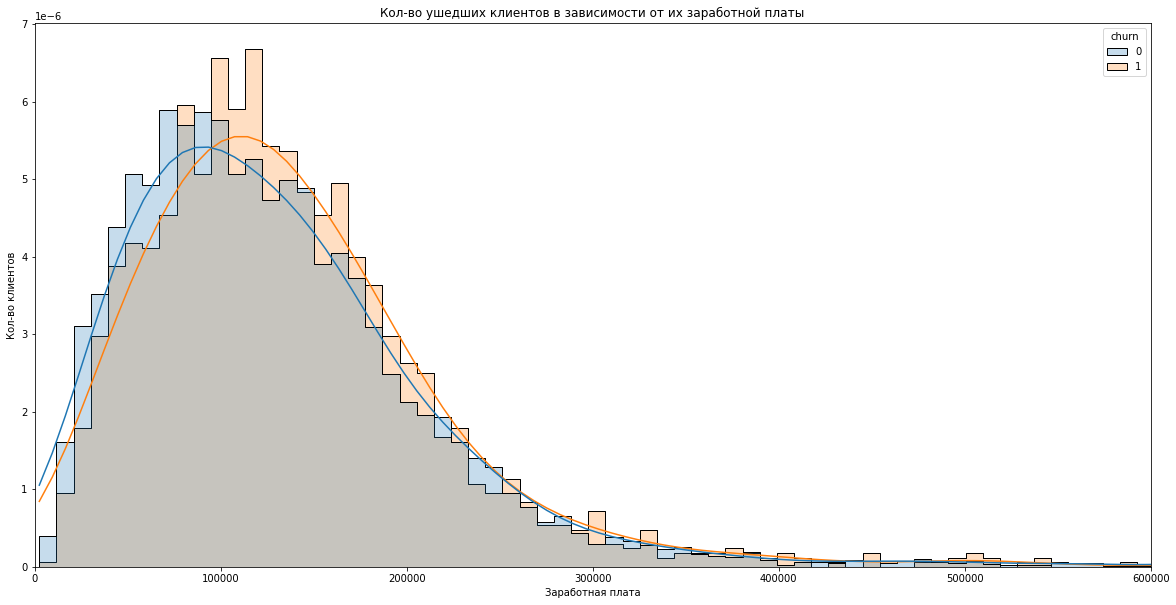

In [176]:
plt.figure(figsize=(20, 10))
sns.histplot(data, x="est_salary", kde=True,  hue="churn", element="step", stat="density", common_norm=False,
             shrink=.8, edgecolor = 'black')
plt.title('Кол-во ушедших клиентов в зависимости от их заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Кол-во клиентов')
plt.xlim([0, 600000])
plt.show()

График показывает что кол-во отточных клиентов выше неотточных при заработной плате от 100000 до 250000. Далее они практически равны.

In [177]:
def est_salary_group(est_salary):
    if 0 >= est_salary >= 100000:
        return '0-0.1'
    if 200000 >= est_salary >= 100001:
        return '0.1-0.2'
    if 300000 >= est_salary >= 200001:
        return '0.2-0.3'
    if est_salary >= 300001:
        return '>0.3' 
data['est_salary_group'] = data['est_salary'].apply (est_salary_group)

In [178]:
churn_est_salary_group = data.pivot_table (index = 'est_salary_group', values = 'churn', aggfunc = ['sum', 'count'])
churn_est_salary_group.columns = churn_est_salary_group.columns.droplevel(level=1)
churn_est_salary_group['part'] = churn_est_salary_group['sum']/churn_est_salary_group['count']*100

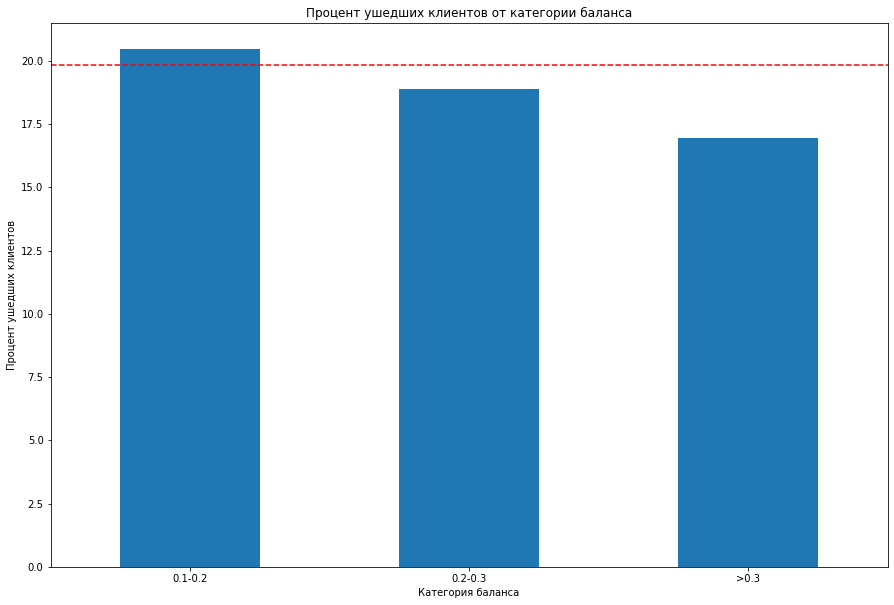

In [179]:
churn_est_salary_group['part'] .plot(kind = 'bar', figsize = (15,10), rot = 0,
                          title = 'Процент ушедших клиентов от категории баланса',
                          xlabel = 'Категория баланса', 
                          ylabel = 'Процент ушедших клиентов');
plt.axhline (y=sum(churn_est_salary_group['sum'])/sum(churn_est_salary_group['count'])*100, color='red', linestyle='--');

Наиболее отточными клиентами являются люди с заработной платой от 100000 до 200000.

#### Промежуточный вывод на основе исследовательского анализа

1. даннык в столбце churn, в котором указаны данные уходит клиент или нет, имеют наибольшую взаимосвязь со столбцами:
   - age — возраст
   - score — баллы кредитного скоринга
   - credit_card — есть ли кредитная карта
   - women/men - пол
   - last_activity — был ли клиент активен последнее время
   - equity — приблизительная оценка собственности клиента
   - products — количество продуктов, которыми пользуется клиент
2. отток клиентов по кол-ву продуктов распределен так:
   - клиенты с 4 продуктами чаще всего покидают банк - их 63,29%
   - на втором месте клиенты с 5 продуктами - 42,11%
   - реже всего уходят клиенты с 1 продуктом - 7,11%
   - клиенты с 2-3 продуктами находятся в диапазоне 19-29%
   - повышение отточности относительно среднего уровня касается клиентов с 3-5 продуктами
3. С увеличением оценки собственности, увеличивается процент оттока клиентов. Минимальное значение при нулевой оценке 4. 3,52%. Максимальное значение при оценке 9 - 53,85%. Зависимость практически линейная. Повышение отточности относительно среднего уровня касается клиентов с оценкой собственности 3-9.
5. Клиенты с повышенной активностью в два раза чаще покидают банк, нежели не активные пользователи. Возможно это из за того что чем больше пользуешься, тем больше можно обнаружить того, что тебе не нравится. 
6. Клиенты мужского пола в два раза чаще покидают банк, нежели женского.
7. Клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт
8. Высокоотточными клиентами, являются клиенты со скорингом 820-940 баллов.
9. Наиболее отточными клиентами являются люди возрастных категорий 26-37 и 51-61. Самыми менее отточными клиентами явлюятся пожилые люди 62-86 лет.
10. Наиболее отличающимися признаками отточных и неотточных клиентов являются:
 - equity — приблизительная оценка собственности клиента. У отточных клиентов оценка собственности выше, чем у неотточных.
 - balance — баланс на счёте. У отточных клиентов баланс на счете выше, чем у неотточных.
 - last_activity — был ли клиент активен последнее время. Отточные клиенты были более активными в последнее время, чем неотточные
 - gender — пол. Отточные клиенты чаще мужчины, реже женщины. 
 - products — количество продуктов, которыми пользуется клиент. Отточные клиенты пользуются большим кол-вом продуктов банка.
11. Наиболее отточными клиентами являются люди с балансом от 2 до 4 млн. 
12. Наиболее отточными клиентами являются люди с заработной платой от 100000 до 200000.

#### Выделим портреты клиентов, которые склонны уходить из банка

In [180]:
def analz_seg(df,q):
    seg_series = df.query(q).agg({
        "user_id":'count',
        "churn":'mean',
        'balance':'median',
        'est_salary':'median',
        'equity':'mean'})
    seg_series.name=q
    return seg_series

pd.concat((
    analz_seg(data,'man == 1 & credit_card == 0 & last_activity == 1'),
    analz_seg(data,'products > 3 & equity > 3')),axis=1).T

,user_id,churn,balance,est_salary,equity
man == 1 & credit_card == 0 & last_activity == 1,717.00,0.42,811012.63,129732.61,3.27
products > 3 & equity > 3,359.00,0.62,1035362.01,124286.75,4.84


Высокооточные признаки:
- Кол-во продуктов более 3
- Оценка собственности более 3
- Активный клиент
- Пол - мужской
- Отсутствие кредитной карты
- Скоринг от 820 до 940
- Возраст 26-37 и 51-61
- Баланс 2-4млн.
- Заработная плата 100-200тыс.

In [181]:
def analz_seg(df,q):
    seg_series = df.query(q).agg({
        "user_id":'count',
        "churn":'mean',
        'balance':'median',
        'est_salary':'median',
        'equity':'mean'})
    seg_series.name=q
    return seg_series

pd.concat((
    analz_seg(data,'man == 1 & credit_card == 0 & last_activity == 1'),
    analz_seg(data,'man == 1 & last_activity == 1 & products > 3'),
    analz_seg(data,'last_activity == 1 & products > 3'),
    analz_seg(data,'man == 1 & products > 3 & equity > 3'),
    analz_seg(data,'products > 3 & equity > 3'),
    analz_seg(data,'26<=age<=37 & products > 3 & equity > 3'),
    analz_seg(data,'26<=age<=37 & last_activity == 1 & products > 3'),
    analz_seg(data,'51<=age<=61 & products > 3 & equity > 3'),
    analz_seg(data,'51<=age<=61 & last_activity == 1 & products > 3'),
    analz_seg(data,'man == 1 & 100000<=est_salary<=200000 & products > 3'),
    analz_seg(data,'man == 1 & 2000000<=balance<=4000000 & products > 3'),
    analz_seg(data,'26<=age<=37 & 100000<=est_salary<=200000 & products > 3'),
    analz_seg(data,'51<=age<=61 & 100000<=est_salary<=200000 & products > 3'),
    analz_seg(data,'26<=age<=37 & 2000000<=balance<=4000000 & products > 3'),
    analz_seg(data,'51<=age<=61 & 2000000<=balance<=4000000 & products > 3'),
    analz_seg(data,'51<=age<=61 & man == 1'),
    analz_seg(data,'26<=age<=37 & man == 1'),
    analz_seg(data,'man == 1 & 100000<=est_salary<=200000'),
    analz_seg(data,'man == 1 & 2000000<=balance<=4000000'),
    analz_seg(data,'man == 1 & products > 3'),
    analz_seg(data,'26<=age<=37 & products > 3'),
     analz_seg(data,'26<=age<=37 & products > 3 & 820<=score<=940'),
    analz_seg(data,'26<=age<=37 & equity > 3'),
    analz_seg(data,'51<=age<=61 & products > 3'),
    analz_seg(data,'51<=age<=61 & equity > 3'),
    analz_seg(data,'man == 1 & 820<=score<=940 & products > 3'),
    analz_seg(data,'51<=age<=61 & 820<=score<=940 & products > 3'),
),axis=1).T

,user_id,churn,balance,est_salary,equity
man == 1 & credit_card == 0 & last_activity == 1,717.00,0.42,811012.63,129732.61,3.27
man == 1 & last_activity == 1 & products > 3,235.00,0.60,691500.99,112167.83,4.21
last_activity == 1 & products > 3,391.00,0.55,725760.89,116355.48,4.09
man == 1 & products > 3 & equity > 3,232.00,0.69,942238.62,121104.74,4.91
products > 3 & equity > 3,359.00,0.62,1035362.01,124286.75,4.84
26<=age<=37 & products > 3 & equity > 3,165.00,0.64,845549.34,106872.27,4.84
26<=age<=37 & last_activity == 1 & products > 3,184.00,0.52,599179.00,92863.08,3.97
51<=age<=61 & products > 3 & equity > 3,56.00,0.68,1397456.58,98829.82,4.96
51<=age<=61 & last_activity == 1 & products > 3,55.00,0.62,947578.39,93027.34,4.24
man == 1 & 100000<=est_salary<=200000 & products > 3,120.00,0.78,1132814.66,139493.00,4.23


In [182]:
data['churn'].mean()

0.1832107225637408

Выберем три портрета с отточными признаками, будем руководствоваться, уровнем оттока, размером сегмента и корреляцией с признаками

Портрет №1 отточного клиента
- Мужчина 
- Активный пользователь
- Кол-во продуктов более 3
- Доля отточных клиентов 60%
- Размер сегмента 235 клиентов

Портрет №2 отточного клиента
- Кол-во продуктов более 3
- Оценка собственности более 3
- Доля отточных клиентов 62%
- Размер сегмента 359 клиентов

Портрет №3 отточного клиента
- Клиент возрастной категории 26-37лет
- Кол-во продуктов более 3
- Доля отточных клиентов 60%
- Размер сегмента 228 клиентов

In [183]:
def analz_seg(df,q):
    seg_series = df.query(q).agg({
        "user_id":'count',
        "churn":'mean',
        'balance':'median',
        'est_salary':'median',
        'equity':'mean'})
    seg_series.name=q
    return seg_series

portrets=pd.concat((
    analz_seg(data,'man == 1 & last_activity == 1 & products > 3'),
    analz_seg(data,'products > 3 & equity > 3'),
    analz_seg(data,'26<=age<=37 & products > 3'),
),axis=1).T
portrets = portrets.rename (columns = {'user_id':'Кол-во пользователей',
                                      'churn':'Доля оттока',
                                      'balance':'Средний баланс',
                                      'est_salary':'Средняя ЗП',
                                      'equity':'Средняя оценка недвижимости',})
portrets

,Кол-во пользователей,Доля оттока,Средний баланс,Средняя ЗП,Средняя оценка недвижимости
man == 1 & last_activity == 1 & products > 3,235.00,0.60,691500.99,112167.83,4.21
products > 3 & equity > 3,359.00,0.62,1035362.01,124286.75,4.84
26<=age<=37 & products > 3,228.00,0.60,695019.83,100782.65,4.10


Уровень оттока в наших портретах в три раза превышает средний уровень оттока в целом по банку. Задействованы признаки с наибольшей корреляцией с оттоком клиентов. Так же сегменты не превышают 500 клиентов.

### Статистический анализ данных

#### Сформулируем и проверим статистическую гипотезу №1

- H_0: Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.
- H_1: Средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.

In [184]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['churn']==0]['est_salary'], \
                       data[data['churn']==1]['est_salary'], \
                       equal_var=False)
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.8626784591490475
Не получилось отвергнуть нулевую гипотезу


Проверка показала, что отвергнуть гипотезу: "Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались", не получилось.

#### Сформулируем и проверим статистическую гипотезу №2

- H_0: Среднее кол-во продуктов у клиентов, которые ушли, равно среднему кол-ву продуктов клиентов, которые остались.
- H_1: Среднее кол-во продуктов у клиентов, которые ушли, не равен среднему кол-ву продуктов клиентов, которые остались.

In [185]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data[data['churn']==0]['products'], \
                       data[data['churn']==1]['products'], \
                       equal_var=False)
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

9.413327765189615e-139
Отвергаем нулевую гипотезу


Проверка показала, что гипотезу: "Среднее кол-во продуктов у клиентов, которые ушли, равно среднему кол-ву продуктов клиентов, которые остались", необходимо отвергнуть

### Сегментация клиентов на основе стратегических показателей

#### Сегмент №1

Портрет №1 отточного клиента
- Мужчина 
- Активный пользователь
- Кол-во продуктов более 3
- Доля отточных клиентов 60%
- Размер сегмента 235 клиентов

#### Сегмент №2

Портрет №2 отточного клиента
- Кол-во продуктов более 3
- Оценка собственности более 3
- Доля отточных клиентов 62%
- Размер сегмента 359 клиентов

#### Сегмент №3

Портрет №3 отточного клиента
- Клиент возрастной категории 26-37лет
- Кол-во продуктов более 3
- Доля отточных клиентов 60%
- Размер сегмента 228 клиентов

### Выводы и рекомендации

#### Выводы

1. даннык в столбце churn, в котором указаны данные уходит клиент или нет, имеют наибольшую взаимосвязь со столбцами:
   - age — возраст
   - score — баллы кредитного скоринга
   - credit_card — есть ли кредитная карта
   - women/men - пол
   - last_activity — был ли клиент активен последнее время
   - equity — приблизительная оценка собственности клиента
   - products — количество продуктов, которыми пользуется клиент
2. отток клиентов по кол-ву продуктов распределен так:
   - клиенты с 4 продуктами чаще всего покидают банк - их 63,29%
   - на втором месте клиенты с 5 продуктами - 42,11%
   - реже всего уходят клиенты с 1 продуктом - 7,11%
   - клиенты с 2-3 продуктами находятся в диапазоне 19-29%
3. С увеличением оценки собственности, увеличивается процент оттока клиентов. Минимальное значение при нулевой оценке - 3,52%. Максимальное значение при оценке 9 - 53,85%. Зависимость практически линейная.
4. Клиенты с повышенной активностью в два раза чаще покидают банк, нежели не активные пользователи. Возможно это из за того что чем больше пользуешься, тем больше можно обнаружить того, что тебе не нравится. 
5. Клиенты мужского пола в два раза чаще покидают банк, нежели женского.
6. Клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт
7. Банк покидают клиенты с баллами выше 706. С повышением баллов до 771, тендеция оттока была на снижение, по после 771 балла она начала расти. При 999 баллах наблюдается максимальный отток клиентов.
8. Чаще всего банк покидают клиенты возраста от 47 до 66 лет - 20,46%. Чуть реже клиенты от 25 до 46 лет - 18,47%. Реже всего клиенты от 67 до 86 лет  - 3,47%
9. Отвергнуть гипотезу: "Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались", не получилось.
10. Гипотезу: "Среднее кол-во продуктов у клиентов, которые ушли, равно среднему кол-ву продуктов клиентов, которые остались", необходимо отвергнуть
11. Сегменты в порядке убывания доли отточных пользователей:
    - Сегмент №1 67,86% отточных клиентов
    - Сегмент №3 57,69% отточных клиентов
    - Сегмент №2 55,17% отточных клиентов
    - Сегмент №4 50,0% отточных клиентов
    - Сегмент №5 33,33% отточных клиентов

#### Рекомендации по каждому сегменту

Сегмент №1:
1. Предложить специальные условия по страхованию объектов собственности
2. Информировать о новых доступных банковских продуктах
3. Предложить оформить кредитную карту
4. Предложить льготные условия для перевода зарплаты в наш банк
5. Предложить повышенный кешбек на разные категории товаров связанных с авто, рыбалкой, охотой

Сегмент №2:
1. Предложить специальные условия по страхованию объектов собственности
2. Информировать о новых доступных банковских продуктах
3. Предложить оформить кредитную карту
4. Предложить льготные условия для перевода зарплаты в наш банк

Сегмент №3:
1. Предложить специальные условия по страхованию объектов собственности
2. Информировать о новых доступных банковских продуктах
3. Предложить оформить кредитную карту
4. Предложить льготные условия для перевода зарплаты в наш банк
5. Предложить повышенный кешбек на походы в кино, рестораны и доставку еды.